In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [3]:
import pandas as pd

file_path = 'calculated_metrics_with_theta.xlsx'
data = pd.read_excel(file_path)
data.dropna(inplace=True)

print(data.shape)


(985, 41)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

amplitude_columns = [col for col in data.columns if 'amplitude' in col]
phase_columns = [col for col in data.columns if 'phase' in col]

print(amplitude_columns)
print(phase_columns)


['amplitudes_matrix_ 1', 'amplitudes_matrix_ 2', 'amplitudes_matrix_ 3', 'amplitudes_matrix_ 4', 'amplitudes_matrix_ 5', 'amplitudes_matrix_ 6', 'amplitudes_matrix_ 7', 'amplitudes_matrix_ 8', 'amplitudes_matrix_ 9', 'amplitudes_matrix_10', 'amplitudes_matrix_11', 'amplitudes_matrix_12', 'amplitudes_matrix_13', 'amplitudes_matrix_14', 'amplitudes_matrix_15', 'amplitudes_matrix_16', 'amplitudes_matrix_17', 'amplitudes_matrix_18']
['phase_values_ 1', 'phase_values_ 2', 'phase_values_ 3', 'phase_values_ 4', 'phase_values_ 5', 'phase_values_ 6', 'phase_values_ 7', 'phase_values_ 8', 'phase_values_ 9', 'phase_values_10', 'phase_values_11', 'phase_values_12', 'phase_values_13', 'phase_values_14', 'phase_values_15', 'phase_values_16', 'phase_values_17', 'phase_values_18']


In [5]:

features = data[['theta_values'] + amplitude_columns + phase_columns]

metrics = data[['beamwidth_deg', 'peak_value_dB', 'average_sll_dB', 'rms_sll_dB']]

print("features \n \n\n\n",features)
print("metriccccs \n\n\n\n",metrics)


features 
 


      theta_values  amplitudes_matrix_ 1  amplitudes_matrix_ 2  \
0       65.756853                   0.1                   0.7   
1       62.955668                   0.1                   0.1   
2       64.101178                   0.8                   0.9   
3      -68.993565                   0.7                   0.2   
4       35.464755                   0.8                   0.1   
..            ...                   ...                   ...   
995    -17.981781                   0.4                   0.1   
996     12.204893                   0.7                   0.5   
997      9.437078                   0.7                   1.0   
998    -90.000000                   0.9                   0.3   
999     76.414157                   0.4                   0.6   

     amplitudes_matrix_ 3  amplitudes_matrix_ 4  amplitudes_matrix_ 5  \
0                     0.9                   0.8                   0.3   
1                     0.3                   0.2           

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(scaled_features)


[[ 1.32343832 -1.21069645  0.6492218  ... -0.52951136 -1.51538052
   0.03073381]
 [ 1.27139305 -1.21069645 -1.24460882 ...  0.57100465  0.90841333
  -0.37941382]
 [ 1.29267632  1.01953385  1.28049867 ... -0.41566488 -0.08049456
  -0.67237642]
 ...
 [ 0.27703193  0.70092952  1.59613711 ...  0.13459313 -0.33256912
  -1.37548664]
 [-1.57048241  1.33813818 -0.61333195 ...  1.38690444 -0.31317877
   1.47601594]
 [ 1.52144818 -0.25488346  0.33358336 ... -0.0361766  -1.26330596
   1.37836174]]


In [7]:
# Output performance metrics
metrics = data[['beamwidth_deg', 'peak_value_dB', 'average_sll_dB', 'rms_sll_dB']]
print(metrics)

     beamwidth_deg  peak_value_dB  average_sll_dB  rms_sll_dB
0       -69.125889      24.109428       22.520353   22.625730
1       -67.470214      22.021010       19.613398   20.068802
2       -69.125889      23.564243       22.648520   22.688229
3       -69.125889      17.253097       16.279027   16.309502
4       -18.518919      18.935012       17.663529   17.721340
..             ...            ...             ...         ...
995     -69.125889      25.016080       22.320084   23.014780
996     -69.125889      16.666136       14.028705   14.615593
997    -155.756853      22.374506       20.613087   20.763498
998     -18.518919      22.470325       20.164156   20.882357
999      65.624530       4.762989       12.249435   13.019185

[985 rows x 4 columns]


In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(scaled_features, metrics, test_size=0.2, random_state=42)

print("X_train\shape:", X_train.shape)
print("X_test\ shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)\


X_train\shape: (788, 37)
X_test\ shape: (197, 37)
y_train shape: (788, 4)
y_test shape: (197, 4)

X_train\:
[[-0.30526065  0.38232519  0.01794493 -0.64853554  0.89555874 -1.23787308
   0.63260424  1.65603722 -1.08175419  1.00541302 -1.59339206  1.31508049
   0.97618494 -1.29496433  1.22946992  0.91848891 -0.97463758 -0.64677321
  -0.94697463  0.44784743  1.01655621 -0.02656265 -1.16165331  0.84854959
   1.11103002  0.78751596 -0.43128858 -0.70520912 -0.55346932  0.0382702
   1.6039388   0.55940827  1.03784574  1.02926084  1.53869976 -0.99184105
   1.61273182]
 [-0.69378692 -1.52930078 -0.29769351  0.6176835  -1.58667935 -0.30258416
  -0.93774651 -0.88526235  1.20058827 -0.25615618  1.2869955  -0.53718969
  -0.30801161  1.25038835  1.54699165  0.60565642 -0.97463758  0.3298312
   0.01729485  0.52145799 -0.61027997 -1.37600605 -1.42910801  1.15050816
  -0.78913939 -0.9568133   0.46495456 -0.09314889 -0.12748174 -0.37597314
  -0.01116179  1.60610107  1.56587182 -0.12774535 -1.64900178  0.

In [9]:
import pandas as pd
import numpy as np

print("NaN count in y_train:")
print(y_train.isnull().sum())

y_train = y_train.dropna()

print("Shape of y_train after dropping NaNs:", y_train.shape)

print("Shape of x_train after dropping NaNs:", X_train.shape)


NaN count in y_train:
beamwidth_deg     0
peak_value_dB     0
average_sll_dB    0
rms_sll_dB        0
dtype: int64
Shape of y_train after dropping NaNs: (788, 4)
Shape of x_train after dropping NaNs: (788, 37)

y_train:
     beamwidth_deg  peak_value_dB  average_sll_dB  rms_sll_dB
978     -69.125889      23.015410       21.461716   21.854643
775     -66.324704      25.388634       24.107795   24.221904
342     -66.324704      18.135315        6.397096   14.527535
904     -69.125889      20.038543       18.691766   18.765376
538     -69.125889      19.784910       18.144639   18.252039
..             ...            ...             ...         ...
109     -69.125889      23.801711       23.569177   23.573971
276     -67.470214      23.284683       22.794135   22.812594
874     -66.324704      22.256570       21.476629   21.527618
443     -69.125889      23.934929       22.614492   22.871332
105     -69.125889      22.741420       20.120672   20.472165

[788 rows x 4 columns]


C:\Softwares\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 28.1620 - mae: 28.6597 - mse: 1432.0127 - val_loss: 26.3558 - val_mae: 26.8558 - val_mse: 1258.6033 - learning_rate: 0.0010
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 27.6921 - mae: 28.1903 - mse: 1397.6091 - val_loss: 26.1234 - val_mae: 26.6234 - val_mse: 1240.9403 - learning_rate: 0.0010
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 27.8114 - mae: 28.3092 - mse: 1409.4377 - val_loss: 25.9155 - val_mae: 26.4155 - val_mse: 1228.4451 - learning_rate: 0.0010
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26.7891 - mae: 27.2882 - mse: 1354.2766 - val_loss: 25.5302 - val_mae: 26.0301 - val_mse: 1204.6555 - learning_rate: 0.0010
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26.2243 - mae: 26.7224 - mse: 1324.8738 - val_loss: 25.0139 - val_mae: 25.5128 - val_mse: 1177.0731 - learning_rate: 0.0010
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25.2873 - mae

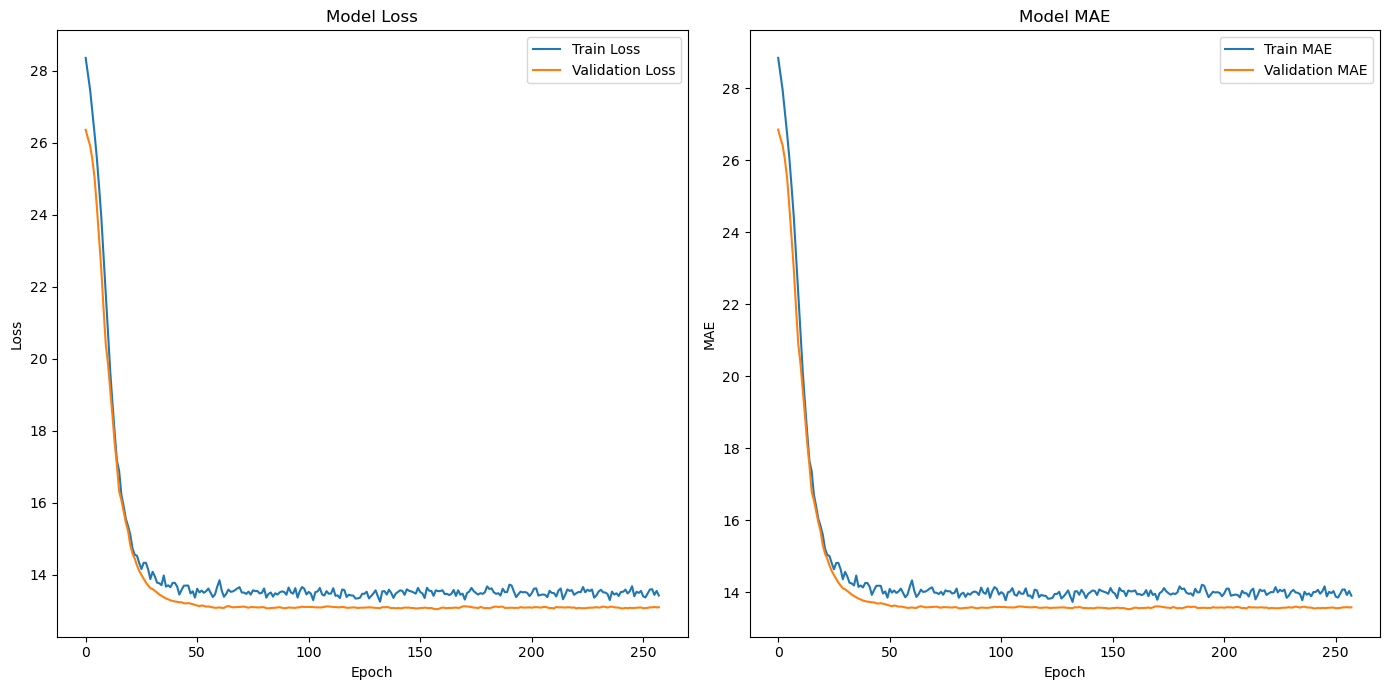

In [41]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),

    Dense(256, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),

    Dense(128, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.2),

    Dense(64, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.4),

    Dense(32, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.2),

    Dense(y_train.shape[1], activation='linear')
])

huber_loss = tf.keras.losses.Huber(delta=1.0)

model_1.compile(optimizer=Nadam(), loss=huber_loss, metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)
lr_scheduler = LearningRateScheduler(scheduler)

history_1 = model_1.fit(X_train, y_train, epochs=1000, batch_size=20, validation_split=0.2, callbacks=[early_stopping, reduce_lr,lr_scheduler])

evaluation = model_1.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation[0]}, Test MAE: {evaluation[1]}, Test MSE: {evaluation[2]}")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_1.history['mae'], label='Train MAE')
plt.plot(history_1.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


C:\Softwares\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - loss: 28.9996 - mae: 29.4981 - mse: 1438.2058 - val_loss: 26.9310 - val_mae: 27.4300 - val_mse: 1271.1232 - learning_rate: 0.0010
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 27.9895 - mae: 28.4881 - mse: 1425.5773 - val_loss: 26.6037 - val_mae: 27.1031 - val_mse: 1253.3474 - learning_rate: 0.0010
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 27.4505 - mae: 27.9485 - mse: 1369.9862 - val_loss: 26.1959 - val_mae: 26.6958 - val_mse: 1231.1091 - learning_rate: 0.0010
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 27.7174 - mae: 28.2160 - mse: 1415.2640 - val_loss: 25.8170 - val_mae: 26.3165 - val_mse: 1212.8794 - learning_rate: 0.0010
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26.7733 - mae: 27.2720 - mse: 1387.0109 - val_loss: 25.2494 - val_mae: 25.7481 - val_mse: 1183.6595 - learning_rate: 0.0010
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 25.4630 - mae

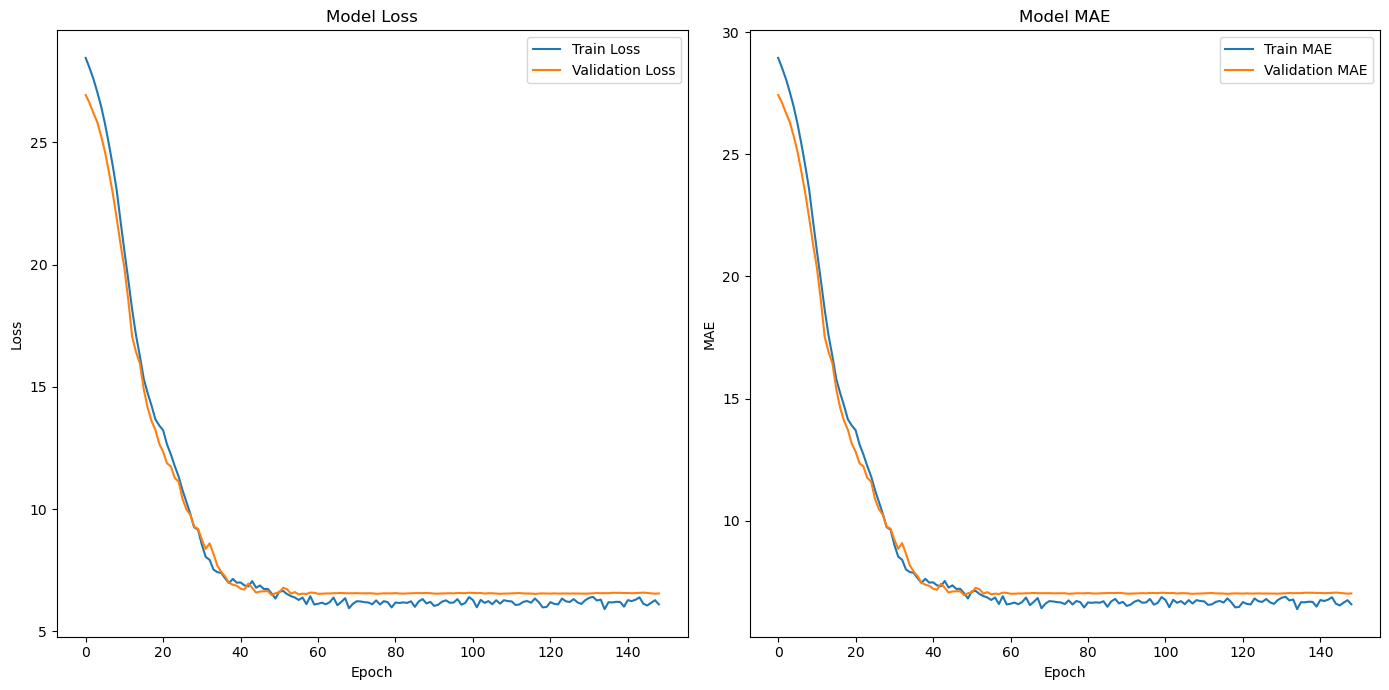

In [44]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),

    Dense(256, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),

    Dense(128, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.2),

    Dense(64, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.4),

    Dense(32, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.2),

    Dense(y_train.shape[1], activation='linear')
])

huber_loss = tf.keras.losses.Huber(delta=1.0)

model_1.compile(optimizer=Nadam(), loss=huber_loss, metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss')

history_1 = model_1.fit(X_train, y_train, epochs=1000, batch_size=20, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

evaluation = model_1.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation[0]}, Test MAE: {evaluation[1]}, Test MSE: {evaluation[2]}")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_1.history['mae'], label='Train MAE')
plt.plot(history_1.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


C:\Softwares\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 28.3053 - mae: 28.8049 - mse: 1414.9929 - val_loss: 26.9421 - val_mae: 27.4408 - val_mse: 1272.8706 - learning_rate: 0.0010
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 28.7148 - mae: 29.2143 - mse: 1490.3547 - val_loss: 26.7442 - val_mae: 27.2439 - val_mse: 1263.2876 - learning_rate: 0.0010
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 27.3527 - mae: 27.8515 - mse: 1378.6024 - val_loss: 26.4694 - val_mae: 26.9693 - val_mse: 1249.2278 - learning_rate: 0.0010
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 27.7521 - mae: 28.2512 - mse: 1450.7373 - val_loss: 26.1517 - val_mae: 26.6517 - val_mse: 1235.4424 - learning_rate: 0.0010
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 26.5087 - mae: 27.0075 - mse: 1352.9432 - val_loss: 25.7078 - val_mae: 26.2078 - val_mse: 1214.8021 - learning_rate: 0.0010
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 25.5941 - mae

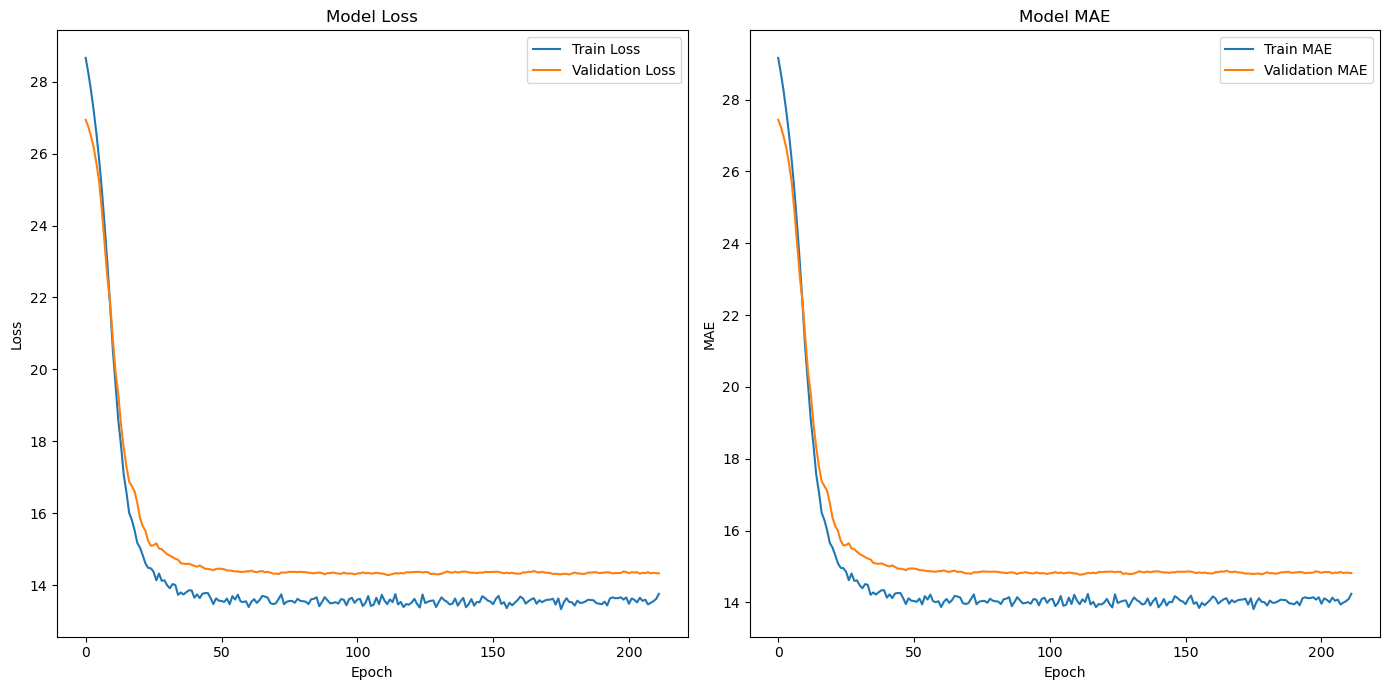

In [45]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),

    Dense(256, kernel_initializer='he_uniform'),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(128, kernel_initializer='he_uniform'),
    BatchNormalization(),
    Activation('selu'),
    Dropout(0.2),

    Dense(64, kernel_initializer='he_uniform'),
    BatchNormalization(),
    Activation('sigmoid'),
    Dropout(0.4),

    Dense(32, kernel_initializer='he_uniform'),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(y_train.shape[1], activation='linear')
])

huber_loss = tf.keras.losses.Huber(delta=1.0)

model_1.compile(optimizer=Nadam(), loss=huber_loss, metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

history_1 = model_1.fit(X_train, y_train, epochs=1000, batch_size=20, validation_split=0.2, callbacks=[early_stopping, reduce_lr, lr_scheduler])

evaluation = model_1.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation[0]}, Test MAE: {evaluation[1]}, Test MSE: {evaluation[2]}")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_1.history['mae'], label='Train MAE')
plt.plot(history_1.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [65]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),

    Dense(256, kernel_initializer='he_uniform'),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(128, kernel_initializer='he_uniform'),
    BatchNormalization(),
    Activation('selu'),
    Dropout(0.2),

    Dense(64, kernel_initializer='he_uniform'),
    BatchNormalization(),
    Activation('sigmoid'),
    Dropout(0.4),

    Dense(32, kernel_initializer='he_uniform'),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(y_train.shape[1], activation='linear')
])

huber_loss = tf.keras.losses.Huber(delta=1.0)

model_1.compile(optimizer=Nadam(), loss=huber_loss, metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)

history_1 = model_1.fit(X_train, y_train, epochs=1000, batch_size=20, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

evaluation = model_1.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation[0]}, Test MAE: {evaluation[1]}, Test MSE: {evaluation[2]}")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_1.history['mae'], label='Train MAE')
plt.plot(history_1.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'nadam' is not defined

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("Step 1: Loading dataset...")

scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(metrics)
print(scaled_metrics)

print("Step 4: Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(scaled_metrics, features, test_size=0.2, random_state=42)

print("NaN count in y_train:")
print(y_train.isnull().sum())

y_train = y_train.dropna()

print("Shape of y_train after dropping NaNs:", y_train.shape)
print("Shape of x_train after dropping NaNs:", X_train.shape)

print("\ny_train:")
print(y_train)

print("Step 5: Converting data to numpy arrays for TensorFlow...")
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

print("\ny_train:")
print(y_train)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("Shape of X_train:", X_train)
print("Shape of X_test:", X_test)
print("Shape of y_train:", y_train)
print("Shape of y_test:", y_test)


Step 1: Loading dataset...
[[-0.29267861  0.9140456   0.86074444  1.03518538]
 [-0.24029265  0.58597218  0.4827519   0.52228362]
 [-0.29267861  0.82840151  0.87741015  1.04772217]
 ...
 [-3.03370313  0.6415035   0.6127419   0.66163484]
 [ 1.30853806  0.65655595  0.55436724  0.68547708]
 [ 3.970857   -2.12512159 -0.47478734 -0.89181989]]
Step 4: Splitting data into training and testing sets...
NaN count in y_train:
theta_values            0
amplitudes_matrix_ 1    0
amplitudes_matrix_ 2    0
amplitudes_matrix_ 3    0
amplitudes_matrix_ 4    0
amplitudes_matrix_ 5    0
amplitudes_matrix_ 6    0
amplitudes_matrix_ 7    0
amplitudes_matrix_ 8    0
amplitudes_matrix_ 9    0
amplitudes_matrix_10    0
amplitudes_matrix_11    0
amplitudes_matrix_12    0
amplitudes_matrix_13    0
amplitudes_matrix_14    0
amplitudes_matrix_15    0
amplitudes_matrix_16    0
amplitudes_matrix_17    0
amplitudes_matrix_18    0
phase_values_ 1         0
phase_values_ 2         0
phase_values_ 3         0
phase_valu

In [110]:
import pandas as pd

print("First row of y_train:")
print(y_train.iloc[0])

print("\nFirst row of y_test:")
print(y_test.iloc[0])


Shape of y_train:
      theta_values  amplitudes_matrix_ 1  amplitudes_matrix_ 2  \
978    -21.903124                   0.6                   0.5   
775    -42.814419                   0.0                   0.4   
342     21.997068                   0.2                   1.0   
904     -0.651813                   0.5                   0.8   
538     26.712599                   1.0                   0.2   
..            ...                   ...                   ...   
109     88.185738                   0.8                   0.8   
276      4.311320                   0.0                   0.1   
874     10.544594                   0.1                   0.8   
443     48.887764                   0.5                   0.4   
105    -24.820772                   0.6                   0.8   

     amplitudes_matrix_ 3  amplitudes_matrix_ 4  amplitudes_matrix_ 5  \
978                   0.3                   0.8                   0.1   
775                   0.7                   0.0       

Epoch 1/1000


C:\Softwares\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 5463.8896 - mae: 45.9009 - val_loss: 5222.7632 - val_mae: 44.5385 - learning_rate: 0.0010
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5424.8770 - mae: 45.6556 - val_loss: 5201.2700 - val_mae: 44.4128 - learning_rate: 0.0010
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5329.7900 - mae: 45.0676 - val_loss: 5175.9824 - val_mae: 44.2831 - learning_rate: 0.0010
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5283.6982 - mae: 44.9776 - val_loss: 5146.5396 - val_mae: 44.1115 - learning_rate: 0.0010
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5249.2061 - mae: 44.8333 - val_loss: 5110.4165 - val_mae: 43.9106 - learning_rate: 0.0010
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5144.0098 - mae: 44.1874 - val_loss: 5048.9727 - val_mae: 43.5933 - learning_rate: 0.0010
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5118.0190 - mae: 44.1663 - val_loss: 4957.7192 - val

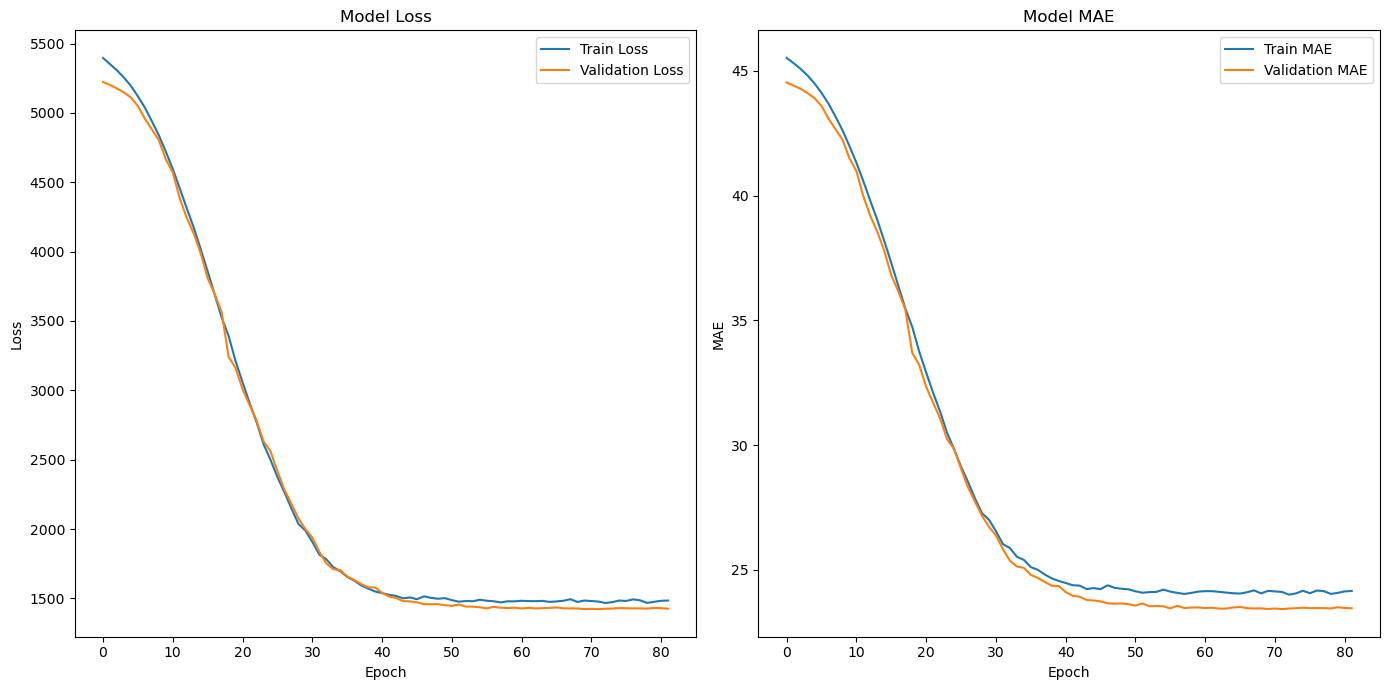

In [112]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def deg2rad(deg):
    return deg * (np.pi / 180.0)

def custom_loss_2(y_true, y_pred):
    theta_true = y_true[:, 0]
    a_true = y_true[:, 1:19]
    p_true = y_true[:, 19:]
    
    theta_pred = y_pred[:, 0]
    a_pred = y_pred[:, 1:19]
    p_pred = y_pred[:, 19:]
    
    theta_true_rad = deg2rad(theta_true)
    theta_pred_rad = deg2rad(theta_pred)
    p_true_rad = deg2rad(p_true)
    p_pred_rad = deg2rad(p_pred)
    
    k = 2 * np.pi
    n_range = tf.cast(tf.range(18), dtype=tf.float32)
    
    phase_shift_true = k * n_range * tf.sin(theta_true_rad[:, tf.newaxis])
    af_true_real = tf.reduce_sum(a_true * tf.cos(p_true_rad + phase_shift_true), axis=1)
    af_true_imag = tf.reduce_sum(a_true * tf.sin(p_true_rad + phase_shift_true), axis=1)
    af_true = tf.complex(af_true_real, af_true_imag)
    
    phase_shift_pred = k * n_range * tf.sin(theta_pred_rad[:, tf.newaxis])
    af_pred_real = tf.reduce_sum(a_pred * tf.cos(p_pred_rad + phase_shift_pred), axis=1)
    af_pred_imag = tf.reduce_sum(a_pred * tf.sin(p_pred_rad + phase_shift_pred), axis=1)
    af_pred = tf.complex(af_pred_real, af_pred_imag)
    
    physics_loss = tf.reduce_mean(tf.abs(af_true - af_pred)**2)
    data_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    
    total_loss = data_loss + physics_loss
    
    return total_loss

model_2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, kernel_initializer='he_uniform'),
    BatchNormalization(),  
    Activation('relu'),
    Dropout(0.3),

    Dense(256, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(128, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    Activation('selu'),
    Dropout(0.2),

    Dense(64, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    Activation('sigmoid'),
    Dropout(0.4),

    Dense(32, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(y_train.shape[1], activation='linear')  
])

model_2.compile(optimizer=Adam(), loss=custom_loss_2, metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history_2 = model_2.fit(X_train, y_train, epochs=1000, batch_size=20, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

evaluation = model_2.evaluate(X_test,y_test)
print(f"Test Loss: {evaluation[0]}, Test MAE: {evaluation[1]}")

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['mae'], label='Train MAE')
plt.plot(history_2.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/1000


C:\Softwares\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 5413.0864 - mae: 45.5906 - mse: 5392.6250 - val_loss: 5237.3442 - val_mae: 44.6033 - val_mse: 5225.7104 - learning_rate: 0.0010
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5332.9263 - mae: 45.2039 - mse: 5315.3291 - val_loss: 5222.7319 - val_mae: 44.5083 - val_mse: 5211.0659 - learning_rate: 0.0010
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5302.0542 - mae: 45.1159 - mse: 5287.2061 - val_loss: 5194.2241 - val_mae: 44.3530 - val_mse: 5182.6045 - learning_rate: 0.0010
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5299.0815 - mae: 45.0231 - mse: 5284.7178 - val_loss: 5155.5269 - val_mae: 44.1494 - val_mse: 5144.1548 - learning_rate: 0.0010
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5210.0864 - mae: 44.6020 - mse: 5194.6475 - val_loss: 5112.1064 - val_mae: 43.9031 - val_mse: 5100.6167 - learning_rate: 0.0010
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5147.4570 - 

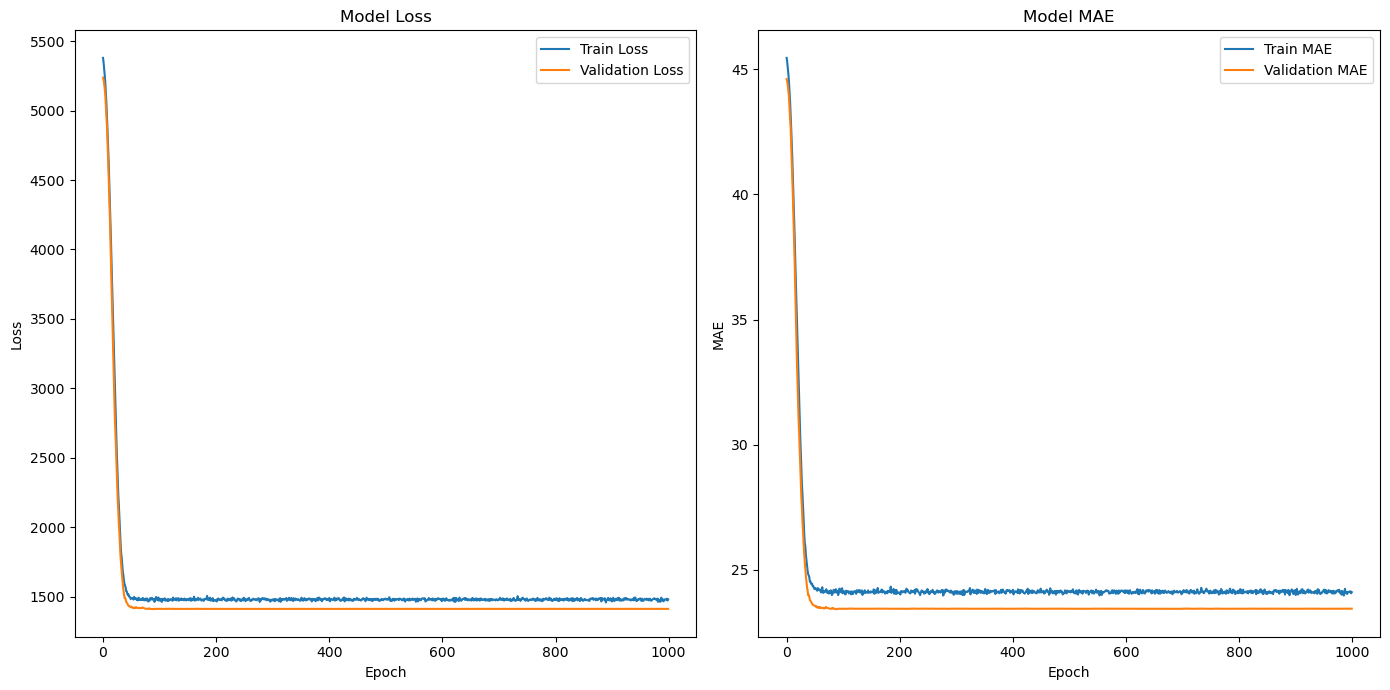

In [113]:
model_2 = Sequential([
Input(shape=(X_train.shape[1],)),

    Dense(512, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.4),

    Dense(256, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.4),

    Dense(256, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.4),

    Dense(256, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(128, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    Activation('selu'),
    Dropout(0.4),

    Dense(128, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    Activation('sigmoid'),
    Dropout(0.4),

    Dense(64, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(64, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),

    Dense(32, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.2),

    Dense(y_train.shape[1], activation='linear')
])

model_2.compile(optimizer=Nadam(), loss=custom_loss_2, metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history_2 = model_2.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.3, callbacks=[early_stopping, reduce_lr])

evaluation = model_2.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation[0]}, Test MAE: {evaluation[1]}, Test MSE: {evaluation[2]}")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['mae'], label='Train MAE')
plt.plot(history_2.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/1000


C:\Softwares\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 22.7682 - mae: 45.7684 - mse: 5426.3843 - val_loss: 22.1591 - val_mae: 44.5430 - val_mse: 5223.1685 - learning_rate: 0.0010
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.6300 - mae: 45.4885 - mse: 5386.0420 - val_loss: 22.1094 - val_mae: 44.4396 - val_mse: 5207.6479 - learning_rate: 0.0010
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.3543 - mae: 44.9337 - mse: 5283.5918 - val_loss: 22.0549 - val_mae: 44.3288 - val_mse: 5189.9980 - learning_rate: 0.0010
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.2186 - mae: 44.6612 - mse: 5239.8296 - val_loss: 21.9296 - val_mae: 44.0735 - val_mse: 5149.1636 - learning_rate: 0.0010
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.1066 - mae: 44.4371 - mse: 5206.9028 - val_loss: 21.7641 - val_mae: 43.7418 - val_mse: 5091.5713 - learning_rate: 0.0010
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.8667 - mae: 43.9564 - mse: 51

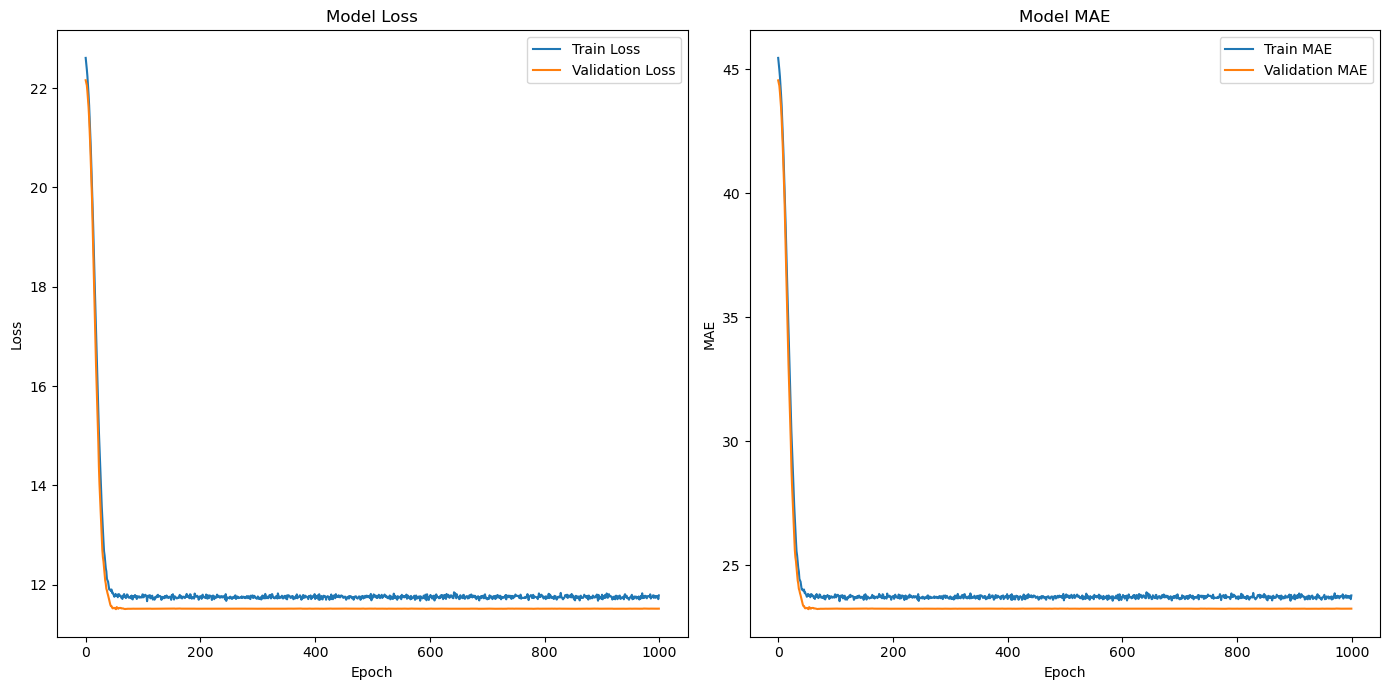

In [80]:
model_2 = Sequential([
Input(shape=(X_train.shape[1],)),
    
    Dense(512, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.4),
    
    Dense(256, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.4),
    
    Dense(256, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.4),
    
    Dense(256, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),
    
    Dense(128, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    Activation('selu'),
    Dropout(0.4),
    
    Dense(128, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    Activation('sigmoid'),
    Dropout(0.4),
    
    Dense(64, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    
    Dense(64, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),
    
    Dense(32, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.2),
    
    Dense(y_train.shape[1], activation='linear')
])

huber_loss = tf.keras.losses.Huber(delta=0.5)

model_2.compile(optimizer=Adam(), loss=huber_loss, metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=1000, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)

history_2 = model_2.fit(X_train, y_train, epochs=1000, batch_size=20, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

evaluation = model_2.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation[0]}, Test MAE: {evaluation[1]}, Test MSE: {evaluation[2]}")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['mae'], label='Train MAE')
plt.plot(history_2.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/500


C:\Softwares\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 44.9321 - mae: 45.3650 - mse: 5343.0239 - val_loss: 44.2175 - val_mae: 44.6445 - val_mse: 5221.5918 - learning_rate: 0.0010
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 44.8362 - mae: 45.2589 - mse: 5333.2559 - val_loss: 44.1121 - val_mae: 44.5256 - val_mse: 5211.2964 - learning_rate: 0.0010
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 44.6041 - mae: 45.0173 - mse: 5320.0410 - val_loss: 44.0363 - val_mae: 44.4403 - val_mse: 5204.4834 - learning_rate: 0.0010
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 44.5428 - mae: 44.9493 - mse: 5295.9604 - val_loss: 43.8984 - val_mae: 44.2939 - val_mse: 5182.6602 - learning_rate: 0.0010
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 44.2350 - mae: 44.6390 - mse: 5222.5864 - val_loss: 43.7115 - val_mae: 44.0991 - val_mse: 5152.9897 - learning_rate: 0.0010
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 44.4762 - mae: 44.8754 - mse: 5285.5

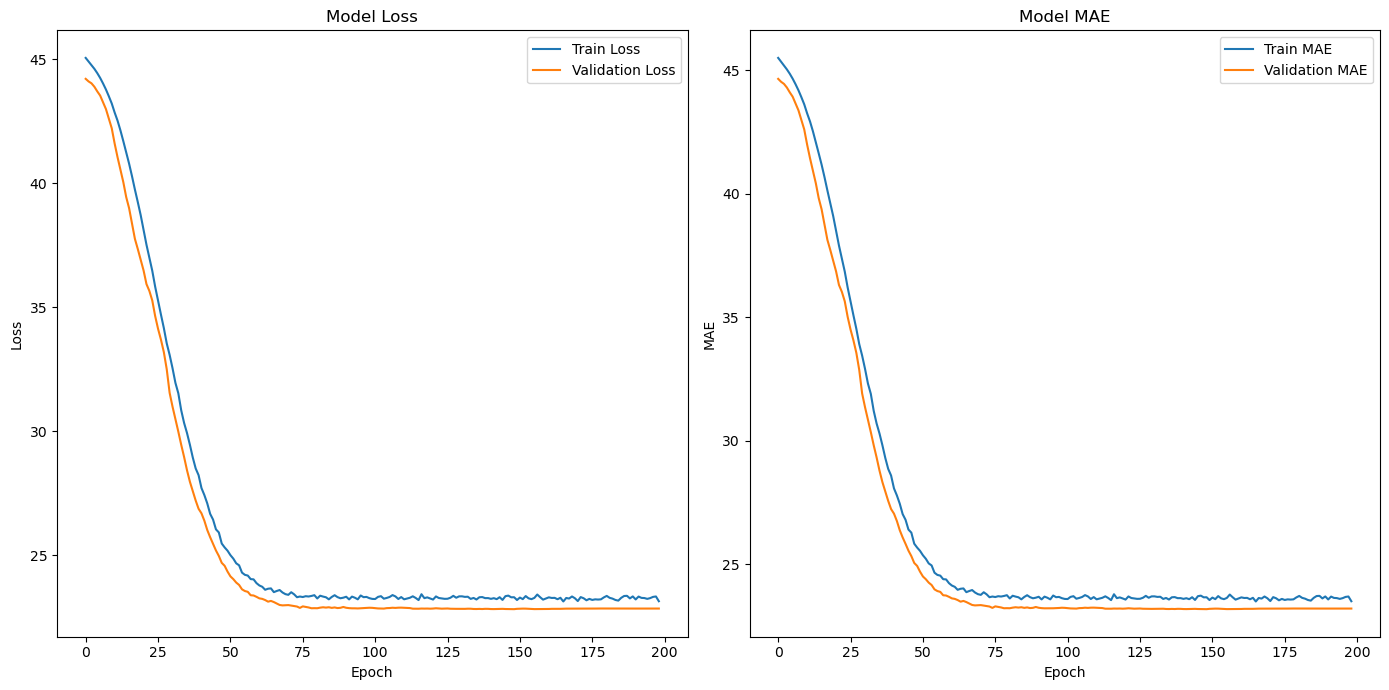

In [81]:
model_2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    
    Dense(512, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),
    
    Dense(256, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),
    
    Dense(256, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),
    
    Dense(128, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),
    
    Dense(128, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),
    
    Dense(64, kernel_initializer='he_uniform'),  
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.3),
    
    Dense(64, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.2),
    
    Dense(32, kernel_initializer='he_uniform'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dropout(0.2),
    
    Dense(y_train.shape[1], activation='linear')
])

huber_loss = tf.keras.losses.Huber(delta=1.0)

model_2.compile(optimizer=Adam(learning_rate=0.001), loss=huber_loss, metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

history_2 = model_2.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

evaluation = model_2.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation[0]}, Test MAE: {evaluation[1]}, Test MSE: {evaluation[2]}")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['mae'], label='Train MAE')
plt.plot(history_2.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()
